<a href="https://colab.research.google.com/github/tugcegurbuz/AI/blob/master/DFS_BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explanation: Depth First Search and Breadth First Search Example with basic filling jar problem.**

**Group Members:**

Arash Ashrafnejad, Tuğçe Gürbüz, Ege Darçın, Hasan Emre Erdemoğlu

*This Homework is written in Python, developed within Python notebook and implemented in Google's Colab.*


---

*Problem: You have two jugs. One holds 7 liters of water when completely full, the other holds 5 liters
when completely full. You have an unlimited source of water to fill either or both jugs, and you
may do so as often as you like, but there are no markings on the jugs, so if you fill a jug the only
way to know how much water you’ve put in is if you fill it to the top. In addition, you have
amazing accuracy in pouring water from one jug to another and never lose a drop. When you
do choose to pour water from one jug to another you must keep pouring until either the
receiving jug is full or the source jug is emptied of water. You can also always choose to fully
empty either jug.*

*Exercise1: Can you get 1 liter of water in one of the jugs?*

*Exercise2: Can you get 3 liters of water in one of the jugs?*



**Question 1: - Part A: (Depth First)** 

>***States:***

This program's states are denoted as:"i (a,b)" . 

The current  jar's number is denoted as an integer, with i. (a) Jar 1  represents the 7L jar and (b) Jar2 represents the 5 liter jar. 

In this sense an example node looks like as this: 
Parent (Current) Node: i = 0 (a,b) = (0,0)



>***Initial & Goal States:***

Initial state occurs when both jars are empty.
1.   Initial state: (0,0)
2.   Goal state: (1,x) or (x,1) where x denoting any real integer within question constraints (Cannot be negative, pass 7 for Jar1 or 5 for Jar 2).


>***Operators:***

There exists 6 different operations for this question, applicable for every node. Note that some of these actions may be redundant. The actions are as follows:

1.   Fill Jar 1 (a)
2.   Fill Jar 2 (b)
3.   Empty Jar 1
4.   Empty Jar 2
5.  Transfer from Jar 1 to Jar 2 
6.  Transfer from Jar 2 to Jar 1

Note that these operations cannot violate question constraints, for example one may not partially fill a Jar, but may partially fill the jar by transferring water from one jar to another.


>***Branching Factor:***
 
 Since the search algorithm has six types of operations, the tree can branch up to six branches. However, in some situations some options may not be viable, or there may be a dead end that the branching must stop, so the minimum number of branching is zero. For example, at the initial node, both of the jars are empty. There are only two viable options: "fill jar 1" or "fill jar 2".The other options will end up in the same situation, so they are discarded.

---



**Question 2: - Part A: (Breadth First)** 

>***States:***

This program's states are denoted as:"i (a,b)" . 

The current  jar's number is denoted as an integer, with i. (a) Jar 1  represents the 7L jar and (b) Jar2 represents the 5 liter jar. 

In this sense an example node looks like as this: 
Parent (Current) Node: i = 0 (a,b) = (0,0)



>***Initial & Goal States:***

Initial state occurs when both jars are empty.
1.   Initial state: (0,0)
1.   Initial state: (0,0)
2.   Goal state: (3,x) or (x,3) where x denoting any real integer within question constraints (Cannot be negative, pass 7 for Jar1 or 5 for Jar 2).

>***Operators:***

There exists 6 different operations for this question, applicable for every node. Note that some of these actions may be redundant. The actions are as follows:

1.   Fill Jar 1 (a)
2.   Fill Jar 2 (b)
3.   Empty Jar 1
4.   Empty Jar 2
5.  Transfer from Jar 1 to Jar 2 
6.  Transfer from Jar 2 to Jar 1

Note that these operations cannot violate question constraints, for example one may not partially fill a Jar, but may partially fill the jar by transferring water from one jar to another.


>***Branching Factor:***
 
 Since the search algorithm has six types of operations, the tree can branch up to six branches. However, in some situations some options may not be viable, or there may be a dead end that the branching must stop, so the minimum number of branching is zero. For example, at the initial node, both of the jars are empty. There are only two viable options: "fill jar 1" or "fill jar 2".The other options will end up in the same situation, so they are discarded.

---



---



**The following two code cells are utilized to construct the program in Google Colab environment.**

In [0]:
# All extra libraries - Required to be used in the implementation:
!pip install anytree
!pip install pydot
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [0]:
# All imports 
# (Includes colab imports that are necessary to run the notebook in Colab.)
# Also includes several API's to ease drawing tree graphs.
import random
import psutil
import numpy as np
from google.colab import files
from IPython.display import Image
from anytree import NodeMixin, RenderTree, Walker
from anytree.exporter import DotExporter

**About MyNode:**

MyNode is an extension of anytree library, which is a library to construct trees at ease. It is extended to accomodate the following:


*   ***i:*** The state jump count (Gives names to nodes) 
*   ***a:*** Holds the integer state of Jar 1
*   ***b:*** Holds the integer state of Jar 2
*   ***parent:*** Holds the parent of this node

MyNode also has __str__() method for outputting the node values as well as a __get_next_states__() methods for getting  the possible values for "a" and "b" at the next states using viable actions.

***Note: *** As the question is fixed, MAX1, MAX2 and MIN are hardcoded to the question constraints.


In [0]:
# Global variables:
MAX1 = 7
MAX2 = 5
MIN = 0

class MyNode(NodeMixin):  # Add Node feature
  def __init__(self, i, a, b, parent):
    self.i = i # count of the node
    self.a = a # Jar1 (7L)
    self.b = b # Jar2 (5L) 
    self.parent = parent # parent of this node
    self.name = str(self)
    return
    
  # Print values of node count and values of jars
  def __str__(self):
    text = str(self.i) + ' (' + str(self.a) + ', ' + str(self.b) + ')'
    return text
  
  # Given the node, fetch new states
  # Laying out the options:
  def get_next_states(self): 

    free = [fill_jar_a(self.a,self.b), fill_jar_b(self.a,self.b),
     (transfer_a_to_b(self.a,self.b)), transfer_b_to_a(self.a,self.b),
     empty_jar_a(self.a,self.b), empty_jar_b(self.a,self.b) ]

    return free # return the plausible choices array

***Explanation of Possible Actions: *** 

These are the actions that can be taken by the program including acceptable and non-acceptable actions. MyNode decides on viable actions to use and disregard non-applicable actions (which fail question constraints) automatically.

Note that these actions also obey to question constraints; that we can either completely fill a Jar, perfectly pour one Jar to other without wastage or clear both Jars individually.

In [0]:
# Actions that can be taken:####################################################  
def transfer_a_to_b(a,b):
  d = MAX2 - b
  if (d < a):
    a = a - d
    b = b + d
  else:
    b = b + a
    a = MIN
  return (a,b)

def transfer_b_to_a(a,b):
  c = MAX1 - a
  if (c < b):
    b = b - c
    a = a + c
  else:
    a = a + b
    b = MIN
  return (a,b)

def empty_jar_a(a,b):
    return (MIN,b)

def empty_jar_b(a,b):
    return (a,MIN)

def fill_jar_a(a,b):
    return (MAX1,b)

def fill_jar_b(a,b):
    return (a,MAX2)
################################################################################

***Question 1 - Depth First Search:*** 

 ***Text Output Explanation:***
After initiating the initial node, this program creates each possible action that may be taken from that node and links them as leave nodes to the node that it is on. After that, the program controls wether that action is taken before on its ancestory tree. If there exists a node with the same values on that tree, that node is pruned. Else, that node is added to the queue. The output text is explained in the following manner:
1. The current node that program is on (The Parent) and its values
2. The candidate leaf node that is to be processed
3. Wether or not this node is pruned (if that node is pruned, that node is not processed)

This row of outputs are repeated for each six of the possible actions (operators). The nodes are seperated in the output with dashed lines.

When a node which satisfies the goal condition is found, the operation of search is terminated, the resulting single path from the root to the goal is described. Additionally for visual purposes, the entire search tree is also given below.

**Note: ** Due to Anytree library, which draws the search tree, the tree grows to the right, instead of left, to create a better, more seperate branches.


In [0]:
class dfs:
  def __init__(self, goal_size):
    # deep copies the goal matrix
    self.init_node = MyNode(0, 0, 0, parent=None)
    self.goal_size = goal_size
    
  def solve(self):
    # Construct a root node, set water size as your goal
    parent_node = self.init_node
    self.leaves = []             # this root has no leaves at the moment
    notFound = True              # goal not reached
    i = 1                        # incremental jump number (0 is root)
    
    # Recusive method to check parent of child nodes:
    def checkParentData(a, b, node):
       # using anytree dependencies to fetch all old relatives data
      parents = node.anchestors   
      # for all parents check whether state repeats
      for parent in parents:                
        if (parent.a==a and parent.b==b):   
          return False
      return True
    
    # Repeat until goal is reached
    while (notFound):
      moves = parent_node.get_next_states()
      # get next available states (a=x, b=y) from various moves

      # expand for all possible actions taken (form childrens)
      for m in moves:
        new_node = MyNode(i, m[0], m[1], parent=parent_node)
        print("Parent (Current) Node: " + "i = " + str(parent_node.i) +
              " (a,b) = (" + str(parent_node.a) + "," + 
              str(parent_node.b) + ")")
        print("New Node (to process queue): " + "i = " + str(i) + 
              " (a,b) = (" + str(new_node.a) + "," + str(new_node.b) + ")")
       
      #  print(str(checkParentData(new_node.a,new_node.b, new_node))) # debug

        if(checkParentData(new_node.a,new_node.b, new_node)):        
          # Check whether this children was seen before, if not:
          print("This node is added as a possible action")
          self.leaves.insert(0,new_node)       
          # add the children, to the begginning for DFS
          
          i += 1                               
          # step name incremented
          
          # Check goal state:
          if m[0] == self.goal_size or m[1] == self.goal_size:
            notFound = False
            print('Found it at ' + str(i-1))
            
            # Print all ancestors to reveal solution pathway
            parents= new_node.ancestors 
            print ("Solution (single) Path:")
            for parent in parents:
              print(str(parent.i) + "(a,b)=(" + str(parent.a) + "," 
                    + str(parent.b) + ")" +  " ->", end="")
            print(str(i-1)+" X ")
            break
            
        else: # children was seen before, break connection to terminate loop.
          print("This node is pruned due to being" +
                " appeared upper to the parent tree")
          new_node.parent=None
  
      # Update parent and children relations, continue search in same manner 
      #until goal is found
      print("-------------------------------------------")
      parent_node = self.leaves[0]
      self.leaves.remove(parent_node)

    return

  
  def display(self):
    DotExporter(self.init_node).to_picture("solution.png")
    print()
    print("All tree steps taken:")
    display(Image("solution.png"))
    #files.download('solution.png')




Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 1 (a,b) = (7,0)
This node is added as a possible action
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 2 (a,b) = (0,5)
This node is added as a possible action
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 3 (a,b) = (0,0)
This node is pruned due to being appeared upper to the parent tree
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 3 (a,b) = (0,0)
This node is pruned due to being appeared upper to the parent tree
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 3 (a,b) = (0,0)
This node is pruned due to being appeared upper to the parent tree
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 3 (a,b) = (0,0)
This node is pruned due to being appeared upper to the parent tree
-------------------------------------------
Parent (Current) Node: i = 2 (a,b) = (0,5)
New Node (to 

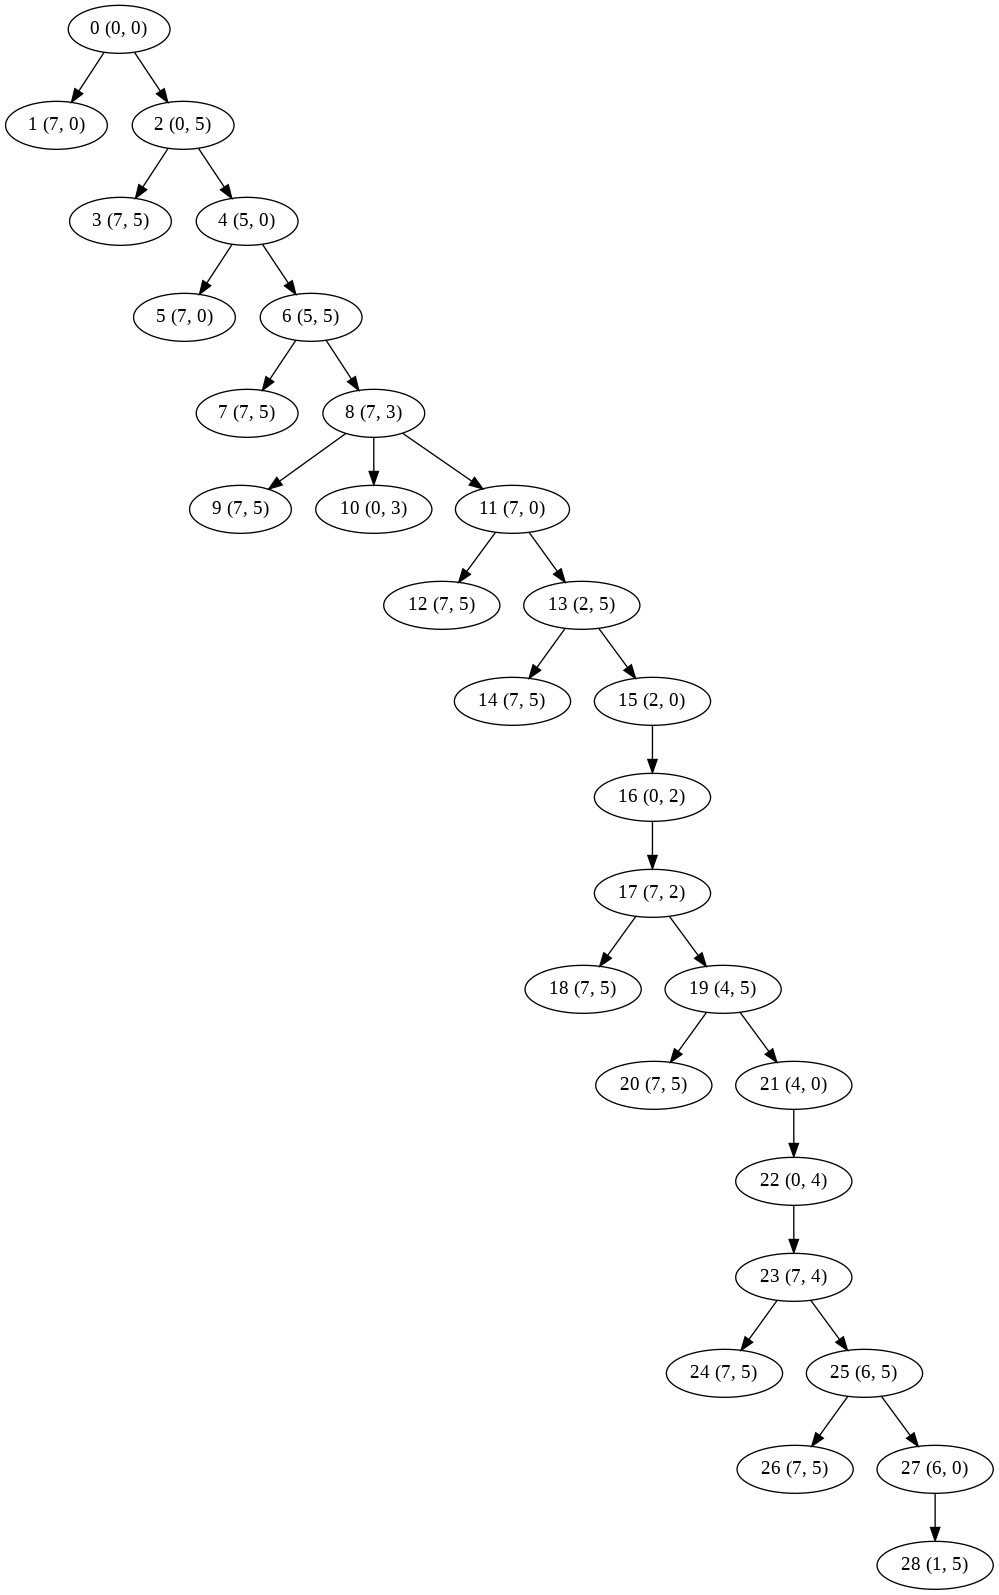

In [0]:
# Solve Question 1:
q2 = dfs(1)  # initialize solver
q2.solve()   # do solve the puzzle
q2.display() # display the result

***Question 2 - Breadth First Search: *** 

 ***Text Output Explanation:***
After initiating the initial node, this program creates each possible action that may be taken from that node and links them as leave nodes to the node that it is on. After that, the program controls wether that action is taken before on its ancestory tree. If there exists a node with the same values on that tree, that node is pruned. Else, that node is added to the queue. The output text is explained in the following manner:
1. The current node that program is on (The Parent) and its values
2. The candidate leaf node that is to be processed
3. Wether or not this node is pruned (if that node is pruned, that node is not processed)

This row of outputs are repeated for each six of the possible actions (operators). The nodes are seperated in the output with dashed lines.

When a node which satisfies the goal condition is found, the operation of search is terminated, the resulting single path from the root to the goal is described. Additionally for visual purposes, the entire search tree is also given below.


In [0]:
class bfs:
  def __init__(self, goal_size):
    # deep copies the goal matrix
    self.init_node = MyNode(0, 0, 0, parent=None)
    self.goal_size = goal_size
    
  def solve(self):
    # Construct a root node, set water size as your goal
    parent_node = self.init_node
    self.leaves = []             # this root has no leaves at the moment
    notFound = True              # goal not reached
    i = 1                        # incremental jump number (0 is root)
    
    # Recusive method to check parent of child nodes:
    def checkParentData(a, b, node):
      parents = node.anchestors             
      # using anytree dependencies to fetch all old relatives data
      for parent in parents:                
        if (parent.a==a and parent.b==b):   
          # for all parents check whether state repeats
          return False
      return True
    
    # Repeat until goal is reached
    while (notFound):
      moves = parent_node.get_next_states() 
      # get next available states (a=x, b=y) from various moves

      # expand for all possible actions taken (form childrens)
      for m in moves:
        new_node = MyNode(i, m[0], m[1], parent=parent_node)
        print("Parent (Current) Node: " + "i = " + str(parent_node.i) +
                " (a,b) = (" + str(parent_node.a) + "," 
              + str(parent_node.b) + ")")
        print("New Node (to process queue): " + "i = " + str(i) + 
                " (a,b) = (" + str(new_node.a) + "," + str(new_node.b) + ")")
        #  print(str(checkParentData(new_node.a,new_node.b, new_node))) # debug
      
        if(checkParentData(new_node.a,new_node.b, new_node)):        
          # Check whether this children was seen before, if not:
          print("This node is added as a possible action")
          self.leaves.append(new_node)         
          # add the children, to the end for BFS
          i += 1                              
          # step name incremented
          
          # Check goal state:
          if m[0] == self.goal_size or m[1] == self.goal_size:
            notFound = False
            print('Found it at ' + str(i-1))
            
            # Print all ancestors to reveal solution pathway
            parents= new_node.ancestors 
            print ("Solution (single) Path:")
            for parent in parents:
              print(str(parent.i) + "(a,b)=(" + str(parent.a) + "," +
                    str(parent.b) + ")" +  " ->", end="")
            print(" X ")
            break
            
        else: # children was seen before, break connection to terminate loop.
          print("This node is pruned due to being" +
                " appeared upper to the parent tree")
          new_node.parent=None

      # Update parent and children relations, continue search in same manner ,
      #until goal is found
      print("-------------------------------------------")
      parent_node = self.leaves[0]
      self.leaves.remove(parent_node)

    return

  
  def display(self):
    DotExporter(self.init_node).to_picture("solution.png")
    print()
    print("All tree steps taken:")
    display(Image("solution.png"))
    #files.download('solution.png')



Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 1 (a,b) = (7,0)
This node is added as a possible action
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 2 (a,b) = (0,5)
This node is added as a possible action
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 3 (a,b) = (0,0)
This node is pruned due to being appeared upper to the parent tree
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 3 (a,b) = (0,0)
This node is pruned due to being appeared upper to the parent tree
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 3 (a,b) = (0,0)
This node is pruned due to being appeared upper to the parent tree
Parent (Current) Node: i = 0 (a,b) = (0,0)
New Node (to process queue): i = 3 (a,b) = (0,0)
This node is pruned due to being appeared upper to the parent tree
-------------------------------------------
Parent (Current) Node: i = 1 (a,b) = (7,0)
New Node (to 

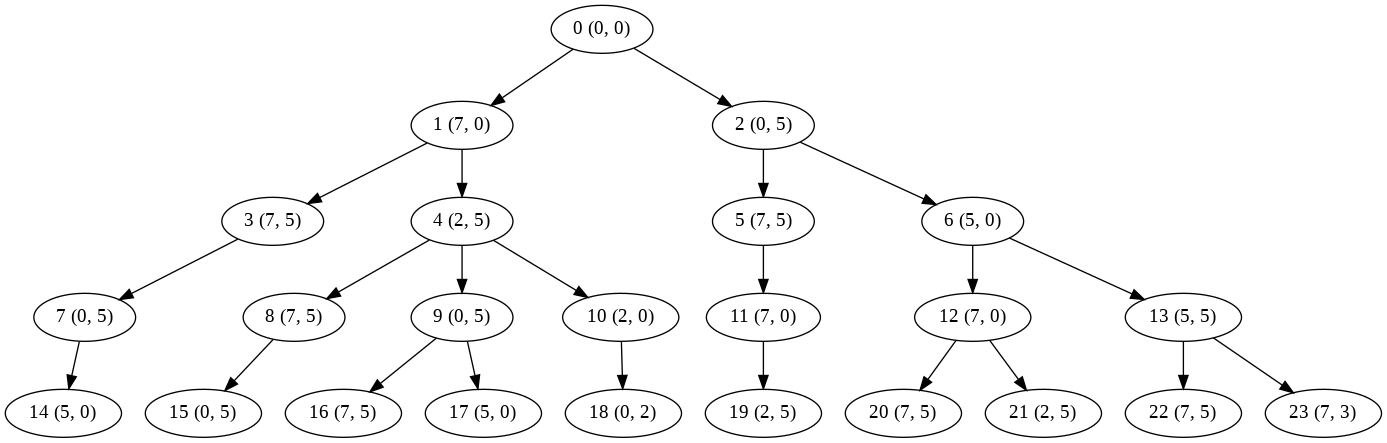

In [0]:
# Solve Question 2:
q2 = bfs(3)  # initialize solver
q2.solve()   # do solve the puzzle
q2.display() # display the result